<a href="https://colab.research.google.com/github/rahiakela/genai-research-and-practice/blob/main/rag-with-python-cookbook/01_loading_data_to_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup


This notebook uses the following Python packages:

- `python-docx` (Word document reading)
- `unstructured` (document partitioning)
- `python-magic-bin` (file type detection)
- `pandas` (data manipulation)
- `PyPDF2` (PDF reading)
- `pillow` (image processing)
- `openpyxl` (Excel file reading)
- `pdf2image` (PDF to image conversion)
- `pytesseract` (OCR)
- `openai` (OpenAI API)
- `python-dotenv` (environment variable management)
- `sqlalchemy` (database connection)
- `psycopg2-binary` (PostgreSQL driver)
- `moviepy` (video processing)
- `pdfminer.six` (PDF text extraction)
- `pi-heif` (HEIF image support)
- `unstructured-inference` (document inference)

Some helper functions may require additional dependencies. Install these packages using pip before running the notebook.

In [ ]:
!pip install python-docx==1.1.2
!pip install unstructured==0.17.2
# !pip install python-magic-bin==0.4.14
!pip install pandas==2.2.3
!pip install PyPDF2==3.0.1
!pip install pillow==11.2.1
!pip install openpyxl==3.1.5
!pip install pdf2image==1.17.0
!pip install pytesseract==0.3.13
!pip install openai==1.82.1
# !pip install python-dotenv==1.1.0
# !pip install sqlalchemy==2.0.41
# !pip install psycopg2-binary==2.9.10
# !pip install moviepy==2.2.1
!pip install pdfminer.six==20250506
!pip install pi-heif==0.22.0
!pip install unstructured-inference==1.0.2

In [ ]:
!sudo apt-get update
!sudo apt-get install poppler-utils
!pip install unstructured-pytesseract

In [ ]:
!pip install langchain-google-genai langchain_core

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage
from google.colab import userdata
import os

In [4]:
# --- Configuration ---
os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_API_KEY")

In [5]:
# Initialize the ChatGoogleGenerativeAI model
# Use a model that supports audio input, like "gemini-1.5-flash" or "gemini-1.5-pro"
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=0, api_key=userdata.get("GOOGLE_API_KEY") )

## 1.1 Loading Word Files in Python

**Option 1**: load word files using the python_docx library

In [ ]:
!wget https://github.com/polzerdo55862/RAG-with-Python-Cookbook/raw/main/datasets/word_files/2023_Jan_7_Feature_Engineering_Techniques.docx

In [ ]:
# tag::python_docx[]
import os
from docx import Document

file_path = "2023_Jan_7_Feature_Engineering_Techniques.docx"

doc = Document(file_path)

text = []
for paragraph in doc.paragraphs:
    text.append(paragraph.text)

full_text = "\n".join(text)
# end::python_docx[]

In [ ]:
full_text

**Option 2**: load word files using the unstructured library

In [ ]:
# tag::unstructured[]
from unstructured.partition.docx import partition_docx
import os
import pandas as pd

elements = partition_docx(filename=file_path)

list_of_elements = []

for element in elements:
    element_dict = {
        "element_id": element.id,
        "file_path": file_path,
        "category": element.category,  # e.g. "Title", "NarrativeText", "ListItem"
        "text": element.text,
        "last_modified": element.metadata.last_modified,
    }

    list_of_elements.append(element_dict)

elements_df = pd.DataFrame(list_of_elements)
# end::unstructured[]

In [ ]:
elements_df.head()

,element_id,file_path,category,text,last_modified
0,135f726911a68beceb56d92e2b9d10bc,2023_Jan_7_Feature_Engineering_Techniques.docx,Title,7 of the Most Used Feature Engineering Techniques,2025-06-30T10:28:28
1,f275447183f11b993f2a87d4b428299b,2023_Jan_7_Feature_Engineering_Techniques.docx,Title,Hands-on Feature Engineering with Scikit-Learn...,2025-06-30T10:28:28
2,9dacd0881e31b366756a6cc20884f661,2023_Jan_7_Feature_Engineering_Techniques.docx,NarrativeText,7 of the most used Feature Engineering Techniq...,2025-06-30T10:28:28
3,3bec63fc43107e87aae98bbaf5313196,2023_Jan_7_Feature_Engineering_Techniques.docx,Title,Table of content,2025-06-30T10:28:28
4,b1b29811f875047fef0bab817d6325c5,2023_Jan_7_Feature_Engineering_Techniques.docx,UncategorizedText,Introduction,2025-06-30T10:28:28


## 1.2 Loading PDF Files

In [ ]:
!wget https://github.com/polzerdo55862/RAG-with-Python-Cookbook/raw/main/datasets/pdf_files/2023_Jan_7_Feature_Engineering_Techniques.pdf

In [ ]:
# tag::load_pdf_using_PyPDF2[]
import PyPDF2
import os
import pandas as pd

file_path = "2023_Jan_7_Feature_Engineering_Techniques.pdf"

with open(file_path, "rb") as file:
    reader = PyPDF2.PdfReader(file)

    # Initialize an empty string to store the extracted text
    list_of_pages = []
    page_counter = 1

    for page in reader.pages:
        page_dict = {
            "file_name": reader.metadata.get("/Title"),
            "producer": reader.metadata.get("/Producer"),
            "page_number": page_counter,
            "text": page.extract_text(),
            "images": page.images,
        }

        list_of_pages.append(page_dict)

        page_counter += 1
# end::load_pdf_using_PyPDF2[]

# Convert the list of pages to a pandas DataFrame
pages_df = pd.DataFrame(list_of_pages)

In [ ]:
# Display the first few rows of the DataFrame
pages_df.head()

,file_name,producer,page_number,text,images
0,2023_Jan_7_Feature_Engineering_Techniques,Skia/PDF m131 Google Docs Renderer,1,7\nof\nthe\nMost\nUsed\nFeature\nEngineering\n...,"[File(name=X7.png, data: 2.2 kB)]"
1,2023_Jan_7_Feature_Engineering_Techniques,Skia/PDF m131 Google Docs Renderer,2,3.2\nBucketizing\nusing\nTensorflow\n3.3\nBuck...,[]
2,2023_Jan_7_Feature_Engineering_Techniques,Skia/PDF m131 Google Docs Renderer,3,A\nstandard\nMachine\nLearning\npipeline — Ins...,"[File(name=X17.png, data: 692 Byte)]"
3,2023_Jan_7_Feature_Engineering_Techniques,Skia/PDF m131 Google Docs Renderer,4,"●\nI\nn\nthe\nsupply\nchain\ncontext\n,\nevery...","[File(name=X20.png, data: 2.6 kB)]"
4,2023_Jan_7_Feature_Engineering_Techniques,Skia/PDF m131 Google Docs Renderer,5,Once\nwe\nhave\nenough\ndata\nthat\ndescribes\...,"[File(name=X26.png, data: 1.5 kB)]"


## 1.3 Loading and Handling CSV and Excel Files

In [ ]:
!wget https://github.com/polzerdo55862/RAG-with-Python-Cookbook/raw/main/datasets/csv_files/census-income.xlsx

In [ ]:
###########################################################################################################
# Define the file path to the Word document
###########################################################################################################
# tag::create_additional_table_column[]
import os
import pandas as pd

file_path = "census-income.xlsx"
df_excel = pd.read_excel(io=file_path)


def create_text_description_of_row(row):
    row["text_description"] = (
        f"""The candidate {row['age']} years old is working in the
            {row['workclass']} sector. The candidate was born in
            {row['native-country']}, is {row['marital-status']}
            and has a {row['relationship']} relationship.
            The candidate has a {row['education']} degree
            and is working as a {row['occupation']}.
            The income of the candidate is {row['income']}."""
    )

    return row


# Apply the function create_text_description_of_row to each row of the data frame
df_extended = df_excel.apply(create_text_description_of_row, axis=1)
# end::create_additional_table_column[]


In [ ]:
# Display the first 5 text_description of the dataset
df_extended["text_description"].head()

,text_description
0,The candidate 39 years old is working in the\n...
1,The candidate 50 years old is working in the\n...
2,The candidate 38 years old is working in the\n...
3,The candidate 53 years old is working in the\n...
4,The candidate 28 years old is working in the\n...


In [ ]:
df_extended["text_description"][0]

'The candidate 39 years old is working in the\n            State-gov sector. The candidate was born in\n            United-States, is Never-married\n            and has a Not-in-family relationship.\n            The candidate has a Bachelors degree\n            and is working as a Adm-clerical.\n            The income of the candidate is <=50K.'

## 1.4 Querying a PostgreSQL Database

```
CREATE USER rag_user WITH PASSWORD 'raguserpassword123';
GRANT ALL ON ALL TABLES IN SCHEMA public TO rag_user;
```

In [ ]:

from dotenv import load_dotenv

load_dotenv()

################################################################################
# Querying the postgres database using SQLAlchemy
################################################################################


username = os.getenv("POSTGRESQL_USER")  # Your PostgreSQL username
password = os.getenv("POSTGRESQL_PASSWORD")  # Your PostgreSQL password
host = os.getenv("DB_HOST", "localhost")  # Default to localhost if not provided
port = os.getenv("DB_PORT", "5432")  # Default to 5432 if not provided
database = os.getenv("DB_NAME", "postgres")  # Database name (e.g., postgres)

# tag::query_postgres[]
import os
import pandas as pd
from sqlalchemy import create_engine

connection_string = (
    f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}"
)
engine = create_engine(connection_string)

with engine.connect() as connection:
    query = """SELECT * FROM categories ORDER BY category_id ASC """
    result = pd.read_sql(query, connection)
    print(result)
# end::query_postgres[]

## 1.5 Loading Audio Files by Using Speech-to-Text Models

In [ ]:
!wget https://github.com/polzerdo55862/RAG-with-Python-Cookbook/raw/main/datasets/audio_files/harvard.wav

In [ ]:
import base64

In [ ]:
audio_file_path = "harvard.wav"

In [ ]:
# Load and encode the audio file in Base64
with open(audio_file_path, "rb") as audio_file:
    encoded_audio = base64.b64encode(audio_file.read()).decode("utf-8")

# Create a HumanMessage with text prompt and audio data
message = HumanMessage(
    content=[
        {"type": "text", "text": "Transcribe the audio."},
        {"type": "media", "data": encoded_audio, "mime_type": "audio/wav"},
    ]
)

# Invoke the model to get the transcription
response = llm.invoke([message])

In [ ]:
response.content

'The stale smell of old beer lingers. It takes heat to bring out the odor. A cold dip restores health and zest. A salt pickle tastes fine with ham. Tacos al pastor are my favorite. A zestful food is the hot cross bun.'

## 1.6 Extracting Text from Images and PDFs Using OCR

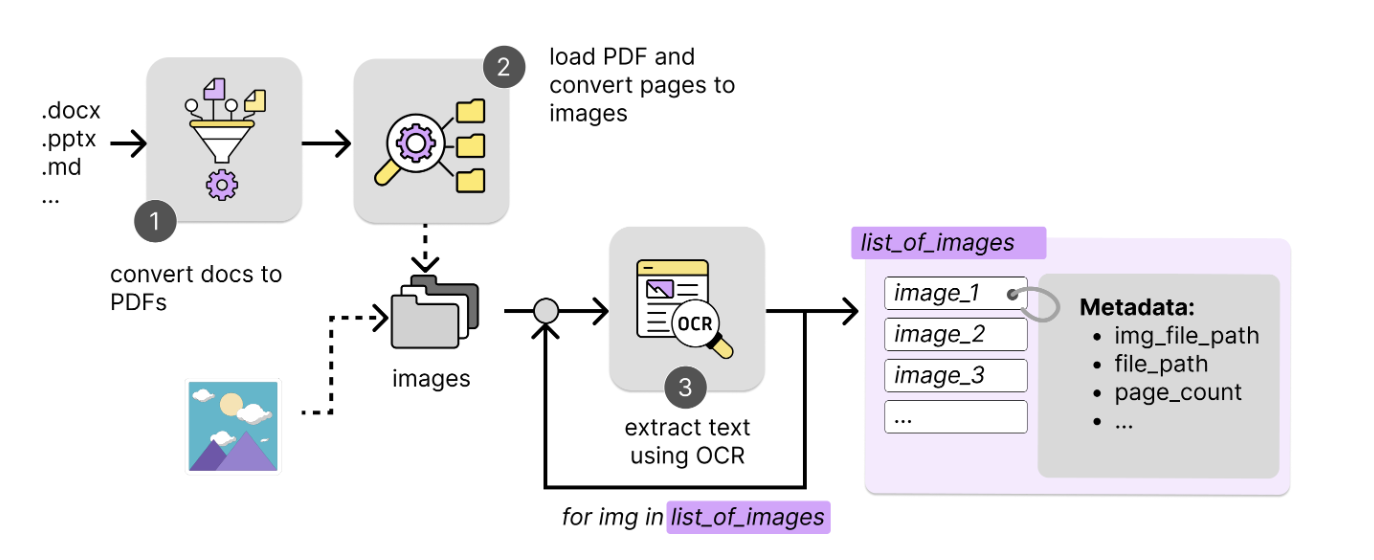

In [ ]:
!wget https://github.com/polzerdo55862/RAG-with-Python-Cookbook/raw/main/datasets/images/example_finance_reporting_slide.png
!wget https://github.com/polzerdo55862/RAG-with-Python-Cookbook/raw/main/datasets/pdf_files/2023_Jan_7_Feature_Engineering_Techniques.pdf

In [ ]:
# tag::extract_text_from_financial_reporting_slide_tesseract[]
import os
from pdf2image import convert_from_path
from PIL import Image
import pytesseract

# Load the sample .png file
image = Image.open(fp="example_finance_reporting_slide.png")

# Use Tesseracst to do OCR on the image
text = pytesseract.image_to_string(image)
# end::extract_text_from_financial_reporting_slide_tesseract[]

In [ ]:
text

'Sales volume growth driven by EMEA 18/19\n\nBusiness Development\n1,926\n\n628 e Sales volume growth driven by\n\nEMEA with sales activity up to 2.3x\nYoY\n\ne Sales activity in 20 countries during\nQ2 19\n« US (28%), Spain (20%), India\n(15%) and Norway (11%) are the\nmain contributors to the Q2 19\nsales volume\n\n~\nWw\nx\n—\n®\n£\n2\n3\n>\n1)\n2\n©\n”\n\nQ4 18 Q119\n\nAmericas J EMEA\n\n \n\n \n\n \n\x0c'

In [ ]:
###########################################################################################################
# Define the file path to the Word document
###########################################################################################################
# tag::extract_text_from_images[]
import os
from pdf2image import convert_from_path
from PIL import Image
import pytesseract

file_path = "2023_Jan_7_Feature_Engineering_Techniques.pdf"

# Convert PDF to a list of images
images = convert_from_path(pdf_path=file_path)

text = []
for i, image in enumerate(images):
    page_text = pytesseract.image_to_string(image)
    text.append(page_text)
# end::extract_text_from_images[]

In [ ]:
text[:1]

['7 of the Most Used Feature Engineering Techniques\n\nHands-on Feature Engineering with Scikit-Learn, Tensorflow, Pandas and Scipy\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n7 of the most used Feature Engineering Techniques—Image by the author\n\nTable of content\n\nIntroduction\n\n1. Encoding\n\n1.1 Label Encoding using Scikit-learn\n\n1.2 One-Hot Encoding using Scikit-learn, Pandas and Tensorflow\n2. Feature Hashing\n\n2.1 Feature Hashing using Scikit-learn\n\n3. Binning / Bucketizing\n\n3.1 Bucketizing using Pandas\n\x0c']

## 1.7 Extracting Text from Images using Multimodal Models

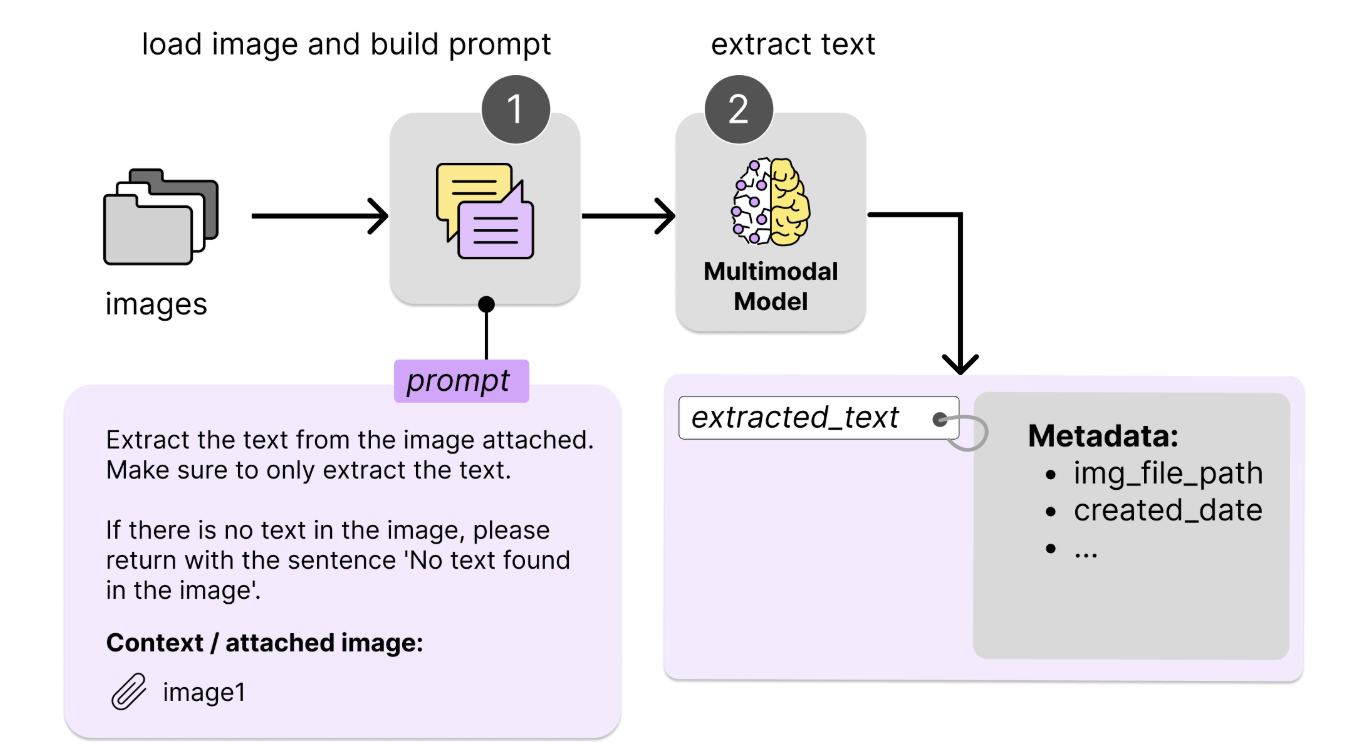

In [ ]:
!wget https://github.com/polzerdo55862/RAG-with-Python-Cookbook/raw/main/datasets/images/example_finance_reporting_slide.png

In [ ]:
# tag::extract_text_from_financial_reporting_slide[]
import os
from PIL import Image
import base64
import openai

png_file_path = "example_finance_reporting_slide.png"

with open(png_file_path, "rb") as image_file:
    base64_image = base64.b64encode(image_file.read()).decode("utf-8")

    prompt = (
        "Extract the text from the image attached. Make sure to only "
        "extract only the text. If there is no text in the image, "
        "please return with the sentence 'No text found in the image."
    )

    message = HumanMessage(
        content=[
            {"type": "text", "text": prompt},
            {
                "type": "media",
                "data": base64_image,
                "mime_type": "image/png"
            },
        ],
    )

    response = llm.invoke([message])
# end::extract_text_from_financial_reporting_slide[]

In [ ]:
response.content

'No text found in the image.'

## 1.8 Generating Text Summaries for Images Using Multimodal Models

In [ ]:
!wget https://github.com/polzerdo55862/RAG-with-Python-Cookbook/raw/main/datasets/images/vietnam.png

In [7]:
# tag::generate_text_summaries_for_images[]
import base64
import openai

image_path = "vietnam.png"

with open(image_path, "rb") as image_file:
    base64_image = base64.b64encode(image_file.read()).decode("utf-8")

    prompt = (
        "You are an assistant for visually impaired users. "
        "Describe the image in detail."
    )

    message = HumanMessage(
        content=[
            {"type": "text", "text": prompt},
            {
                "type": "media",
                "data": base64_image,
                "mime_type": "image/png"
            },
        ],
    )

    response = llm.invoke([message])
# end::generate_text_summaries_for_images[]


In [8]:
response.content

"The image depicts a cityscape at twilight, likely in a Southeast Asian city.  The scene is dominated by a skyline of modern skyscrapers, illuminated against a soft, pastel sky.  The colors are muted blues and purples in the sky, transitioning to warmer tones near the horizon.\n\nThe most prominent buildings are several tall, slender skyscrapers, with one particularly tall and pointed building standing out near the center.  Other buildings are shorter and wider, showing a mix of architectural styles.  The buildings are brightly lit, reflecting in the calm water of a river or bay in the foreground.  The water is smooth, creating a mirror-like reflection of the city lights.\n\nAlong the waterfront, there's a low-lying area with what appears to be a small dock or pier with a boat moored.  There are also some trees and landscaping visible along the riverbank.  The overall atmosphere is serene and peaceful, capturing the beauty of the city at dusk.  The sky shows a gentle movement of clouds

## 1.9 Generating Text Summaries for Embedded Tables Using Multimodal Models

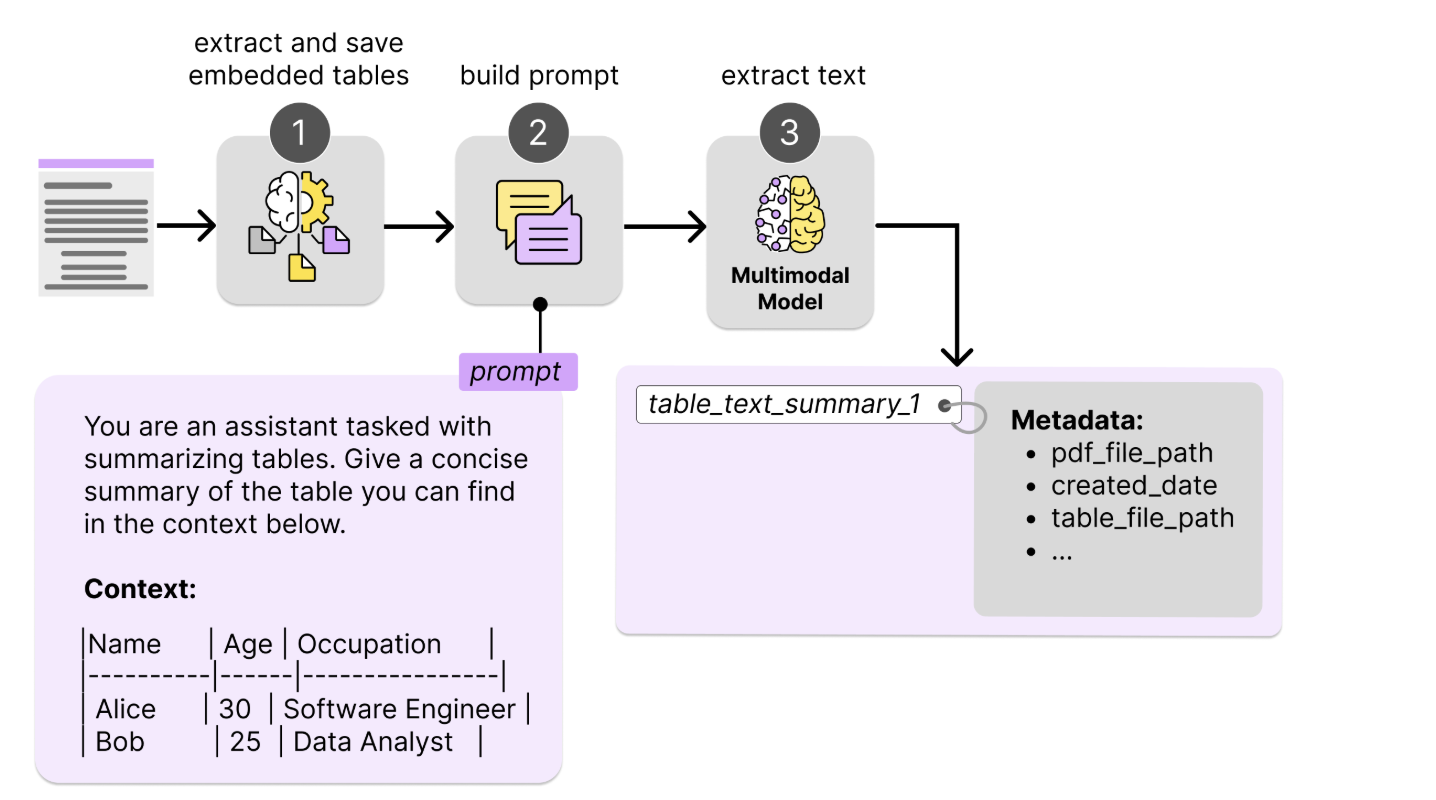

In [ ]:
!wget https://github.com/polzerdo55862/RAG-with-Python-Cookbook/raw/main/datasets/pdf_files/adult_data_article.pdf

In [20]:
# tag::extract_embedded_tables_from_pdf[]
import os
from unstructured.partition.pdf import partition_pdf

pdf_file_path = "adult_data_article.pdf"

tables = []
texts = []

# partition the PDF file into its elements
raw_pdf_elements = partition_pdf(
    filename=pdf_file_path,
    strategy="hi_res",
)

for element in raw_pdf_elements:
    if "unstructured.documents.elements.Table" in str(type(element)):
        tables.append(str(element))

# end::extract_embedded_tables_from_pdf[]

In [21]:
# tag::summarize_tables[]
import pandas as pd


def summarize_tables(row):
    summary_prompt = f"""You are an assistant tasked with summarizing tables. \
                    Give a concise summary of the table. Table chunk: {row.table}"""

    # Initialize model and generate the table summary
    message = HumanMessage(
        content=[
            {"type": "text", "text": summary_prompt},
        ],
    )

    row["table_summary"] = llm.invoke([message]).content

    return row


# create a pandas dataframe from the tables
tables_df = pd.DataFrame(tables, columns=["table"])

# add a column to the dataframe to store the summaries
tables_df = tables_df.apply(summarize_tables, axis=1)
# end::summarize_tables[]

In [22]:
tables_df

,table,table_summary
0,Age Education Occupation Hours-per- Income wee...,"The table shows data on individuals, including..."


In [24]:

# tag::test_ask_a_question[]
# define a random question to the embedded table
user_question = "What are the education levels of the people working in Sales?"


def build_prompt_and_generate_answer(user_question, found_table):
    """
    This function builds a prompt using the user's question and the context of the table
    and generates an answer using the OpenAI API

    Parameters:
        user_question: the question asked by the user
        found_table: the table context to generate the answer from

    Returns:
        answered_question: the answer to the user's question
    """

    question_prompt = f"""You are an assistant using the content from PDFs \
                        to answer questions. Below you can find the \
                        user's question and relevant context. Please use the \
                        context to generate an answer to the user's question.

                        # User question: {user_question}

                        # Context:

                        ## Table summary:
                        {found_table.table_summary}

                        ## Table content:
                        {found_table.table}
                    """

    message = HumanMessage(
        content=[
            {"type": "text", "text": question_prompt},
        ],
    )

    answered_question = (llm.invoke([message]).content)

    return answered_question


# generate the answer to the user's question
# as context we using the first entry in the tables_df
answered_question = build_prompt_and_generate_answer(
    user_question=user_question, found_table=tables_df.iloc[0]
)

print(answered_question)
# end::test_ask_a_question[]

The provided data shows that individuals working in Sales have the following education levels:  Some-college, Bachelors, and HS-grad.


### 1.10 Parsing PDFs with Multiple Media Content Using Unstructured and Multimodal Models

In [ ]:
# tag::extract_pdf_elements[]
from unstructured.partition.pdf import partition_pdf
import os

# set the OCR agent to tesseract
os.environ["OCR_AGENT"] = "tesseract"

pdf_file_path = "../datasets/pdf_files/adult_data_article.pdf"
image_output_dir = "../datasets/extracted_content_from_pdfs/images"

# get elements using the function extract_pdf_elements
raw_pdf_elements = partition_pdf(
    filename=pdf_file_path,
    extract_images_in_pdf=True,
    extract_image_block_types=["Image", "Table"],
    extract_image_block_to_payload=False,
    extract_image_block_output_dir=image_output_dir,
)

# categorize elements by type
tables = []
texts = []
titles = []

# fill the just created lists with the elements
for element in raw_pdf_elements:
    if "unstructured.documents.elements.Table" in str(type(element)):
        tables.append(str(element))
    elif "unstructured.documents.elements.NarrativeText" in str(type(element)):
        texts.append(str(element))
    elif "unstructured.documents.elements.Title" in str(type(element)):
        titles.append(str(element))
# end::extract_pdf_elements[]


Failed to get OCRAgent instance: No module named 'unstructured_pytesseract'


RuntimeError: Could not get the OCRAgent instance. Please check the OCR package and the OCR_AGENT environment variable.

### 1.11 Loading Videos Using Speech-to-Text and Multimodal Models

You can find the test video I used on YouTube: [Learn Data Science Tutorial - Full Course for Beginners](https://www.youtube.com/watch?v=ua-CiDNNj30)

In [ ]:

# tag::load_video_and_extract_frames[]
import os
import pandas as pd

from moviepy import VideoFileClip, TextClip, CompositeVideoClip

video_file_path = "../datasets/videos/learn-data-science-tutorial.mp4"
image_output_folder = "../datasets/videos/video_extracted_images"

clip = VideoFileClip(video_file_path)

# create a list of timestamps from which we want to extract a frame
time_step = 10  # time in seconds
timestamps = list(range(0, int(clip.duration) - time_step, time_step))

# for each timestamp extract a frame
for timestamp in timestamps:
    frame_image_path = os.path.join(image_output_folder, f"frame_{timestamp}.png")
    clip.save_frame(frame_image_path, t=timestamp)
# end::load_video_and_extract_frames[]


c:\Users\z004j58u\repos\others\rag-oreily-book\.venv_ch01_loading_data\Lib\site-packages\moviepy\video\io\ffmpeg_reader.py:294: SyntaxWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
c:\Users\z004j58u\repos\others\rag-oreily-book\.venv_ch01_loading_data\Lib\site-packages\moviepy\video\io\ffmpeg_reader.py:367: SyntaxWarning: invalid escape sequence '\d'
  rotation_lines = [l for l in lines if 'rotate          :' in l and re.search('\d+$', l)]
c:\Users\z004j58u\repos\others\rag-oreily-book\.venv_ch01_loading_data\Lib\site-packages\moviepy\video\io\ffmpeg_reader.py:370: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('\d+$', rotation_line)


FileNotFoundError: '../datasets/videos/learn-data-science-tutorial.mp4' not found

In [ ]:

# tag::video_to_audio[]
# for each timestamp extract the audio sequence and save it to a .mp3 file
audio_output_folder = "../datasets/videos/video_extracted_audio"

for timestamp in timestamps:
    audio_clip = clip.subclip(timestamp, timestamp + time_step).audio
    output_audio_path = os.path.join(audio_output_folder, f"audio_{timestamp}.mp3")
    audio_clip.write_audiofile(output_audio_path)

# end::video_to_audio[]

NameError: name 'timestamps' is not defined

In [ ]:

# tag::audio_to_text[]
from openai import OpenAI


def audio_to_text(audio_path):
    """
    Convert audio to text using OpenAI's Whisper model.

    Parameters:
    audio_path (str): The path to the audio file.

    Returns:
    str: The text recognized from the audio.

    """
    # Initialize the OpenAI client with your API key

    client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

    # Open and read the audio file
    with open(audio_path, "rb") as audio_file:
        # Transcribe
        transcription = client.audio.transcriptions.create(
            model="whisper-1", file=audio_file
        )

    # save the transcription to a text file
    text_file_path = audio_path.replace(".mp3", ".txt")
    with open(text_file_path, "w") as text_file:
        text_file.write(transcription.text)

    return


# List all files in folder audio_output_folder
audio_files = os.listdir(audio_output_folder)

for audio_file in audio_files:
    absolut_path_audio_file = os.path.join(audio_output_folder, audio_file)
    # Use the function audio_to_text to convert the audio to text
    audio_to_text(audio_path=absolut_path_audio_file)
# end::audio_to_text[]

BadRequestError: Error code: 400 - {'error': {'message': "Invalid file format. Supported formats: ['flac', 'm4a', 'mp3', 'mp4', 'mpeg', 'mpga', 'oga', 'ogg', 'wav', 'webm']", 'type': 'invalid_request_error', 'param': None, 'code': None}}

In [ ]:
!sudo apt-get update
!sudo apt-get install poppler-utils

In [ ]:
!pip install unstructured-pytesseract